# \[Learning Machine Learning\] Part I: Linear Regression in 9 Lines of

Pure Python

Joshua Bambrick  
2025-02-08

# Introduction

In this tutorial you will implement, train and evaluate your first
Machine Learning model in pure Python, with little to no coding
knowledge assumed. Along the way, you will learn all the most
foundational concepts and terminology of modern Machine Learning (ML).

For illustration, we introduce the **linear regression** model. While
this algorithm (you can jump to [the code](#linear-regression), but
remember to come back!) seems simple, it is not just a toy. It is widely
used in real-world applications and is a great place to start modelling
Machine Learning problems. In fact, linear regression lies at the heart
of all neural networks.

To make this tutorial as accessible as possible, I lean on the side of
overexplaining concepts to avoid leaving anyone behind.

Also for this reason, I avoid as much fancy Python syntax as possible
and choose not to use any libraries, instead preferring to use pure
Python to implement our model. In practice, we always use libraries like
numpy, jax, or scikit-learn to make our code cleaner and way more
efficient. If you ever try to use these algorithms for a real
application, please use a machine learning library!

# Our problem

## Guess the weight of the cake

To introduce linear regression, we need to start with a problem to
solve. We’re going to go with the classic fairground game *Guess the
Weight of the Cake*. The rules are pretty self-explanatory: you see a
cake, you guess its weight, closest guess wins!

<figure>
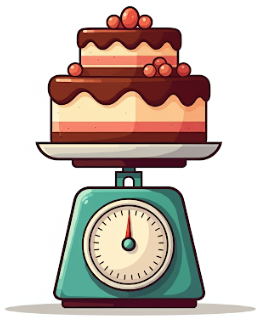
<figcaption aria-hidden="true">Your mission: Guess the weight of the
cake.</figcaption>
</figure>

To make the game (quite dramatically) easier, we’re going to assume that
we know:

-   What the ingredients are of the cake
-   How much of each ingredient was added

In particular we assume all cakes contain flour, eggs, butter, and
sugar[1].

<figure>
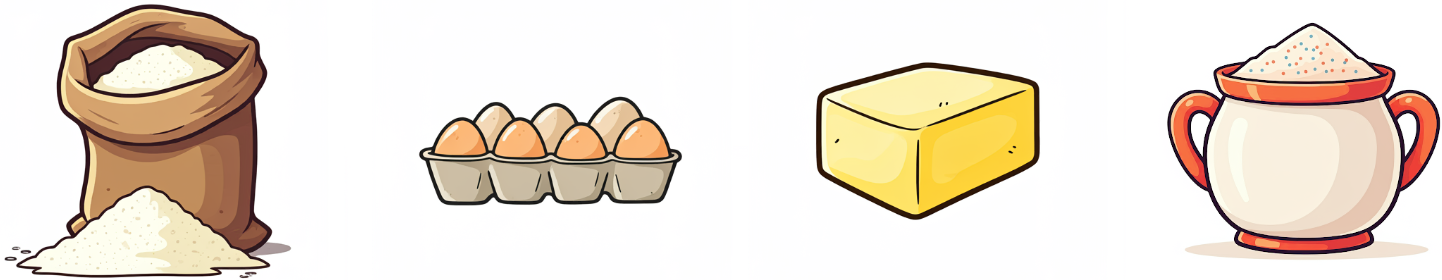
<figcaption aria-hidden="true">Our four ingredients: flour, eggs,
butter, and sugar.</figcaption>
</figure>

## Our dataset

Because this is a Machine Learning problem, we need to have **a
dataset** to learn from. Using this, we will build a model which can
predict the weights of cakes that weren’t in the dataset to begin with.
In other words, we want our model to **generalise**.

Our `dataset`, which [you can download](dataset.json), with fifty
example cakes (first ten shown) is:

[1] An earlier draft of this blog additionally included milk before my
wife informed me that cakes are not normally made with milk.

Each cake in our dataset is referred to as an **example**. Each
ingredient can have different units (e.g., flour may be measured in
grams whereas eggs are measured in, well, eggs). We won’t assume that we
know the units for each ingredient, but we do know, for each example
cake, how much of each ingredient it contains and the cake’s weight.

Our model will see several examples and try to identify the general
pattern.

## Regression vs classification

Problems such as this, where we want to predict a single number
corresponding to our input, **regression** problems. Such problems are
often contrasted with **classification** in which we want to predict a
single ‘class’ (or category) corresponding to our input.

# Our model

To start, we’re going to consider a very simple and hopefully familiar
model which only considers the amount of flour. We hypothesise that this
is a good starting point because we suspect that flour makes up the bulk
of a typical cake.

A **model** is just a mathematical formula that gives you a predicted
value. They can be very complicated, but we will start with one of the
most basic ones conceivable.

We define our model as:

``` latex
y = mx
```

That is, given the amount of flour, `x`, multiply it by some constant,
`m`. The result of this multiplication, `y`, will be our predicted value
of the weight of the cake. Pretty straightforward, right?

In Machine Learning terminology, `x` is our **input**/**feature**, `m`
is our **weight**/**parameter** and `y` is our
**output**/**prediction**. The true value of `y` labelled in the dataset
is called our **target**/**label**.

We call this model **linear regression** because we assume that there is
a linear (that is, a straight line) relationship between `y` and `x`.
Since we have good reason to expect that the amount of flour is
correlated with the cake weight, we suspect that this model will work
reasonably well.

But how do we compute the value of `m`? Remember that, for the purposes
of this tutorial, we are assuming that we don’t know the units of any
ingredient in advance. Instead we will use an algorithm called
**gradient descent**. This algorithm is used to train effectively all
neural networks today.

# Gradient descent

## Intuitively understanding gradient descent

Imagine you are given a challenge to walk down a hill as fast as
possible. Just one catch, you are blindfolded so you can’t *see* which
way downhill is.

<figure>
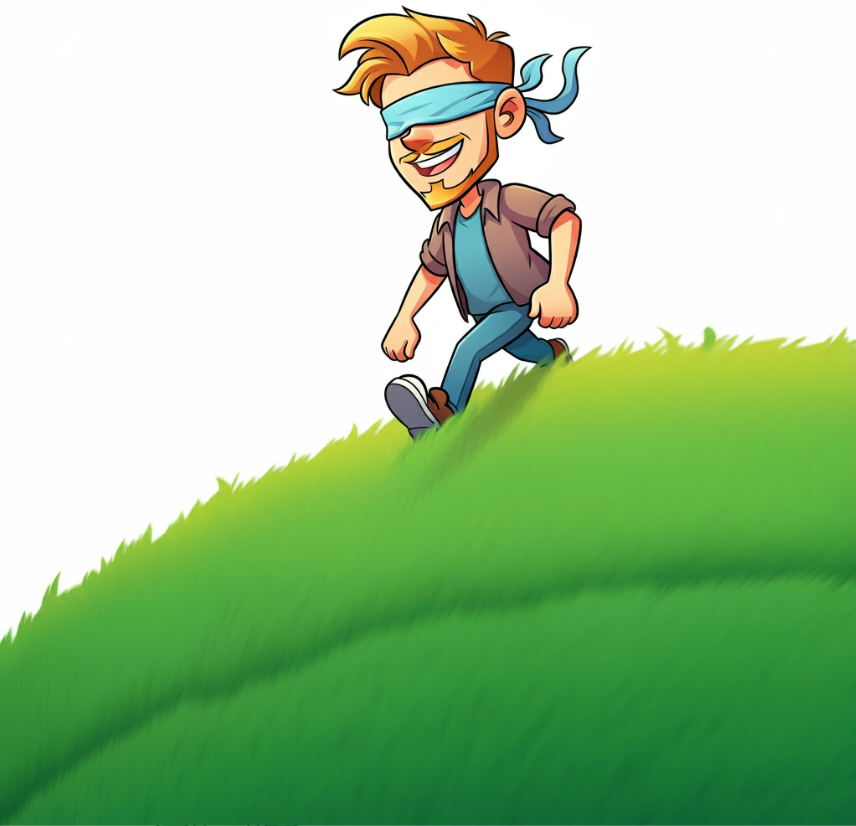
<figcaption aria-hidden="true">The gradient descent
challenge.</figcaption>
</figure>

However, you can tell what direction is downhill from the direction your
feet slant while standing on the slope. You realise that if you take a
step downhill in the steepest direction, you will get closer to the
bottom as fast as possible. The steepness of the hill at each place
tells you, if you were to take a step downhill, how much lower you are
likely to be. You take a step, feel around to find the steepest
direction again, and repeat!

This is gradient descent. It’s not just analogous to gradient descent,
but this approach to get downhill is itself gradient descent.

## Using gradient descent to train our model

To find the best value of `m`, instead of trying to get to the position
with the lowest height, we want to find the `m` value with the lowest
**loss**. A loss tells us how far away our predictions are from the
target (later we will dig into how to compute these ‘losses’). Instead
of steepness, we will consider the **gradient**, which tells us how the
loss will change if we increase `m`. Hence, stepping in the opposite
direction should lead us to lower loss values. The size of the step that
we take is called the **step size** or **learning rate**.

Consider a graph which shows the value of the loss for many different
values of `m`:

From this plot, we can see that the best `m` value is around 3 (larger
`m` values increase the loss). With smaller `m` values, the gradient is
negative (larger `m` values decrease the loss).

Gradient descent starts off with a random value of `m` meaning that we
can start anywhere on the blue line. The ‘direction’ we decide to step
in this single parameter setup simply refers to whether the gradient has
a positive value vs a negative value. If it is negative, we step to the
right (increase the parameter). If it is positive, we step to the left
(decrease the parameter). By following this approach, we get ever closer
to the value of `m` that minimises the loss function.

Note that it is important not to take a step that is too big. If you do,
you might step all the way over the minimum value and end up with an
even worse loss value than when you started! On the flipside, taking
small steps ensures we will get close to the minimum value, but if the
step size is too small it can take a very long time.

<figure>
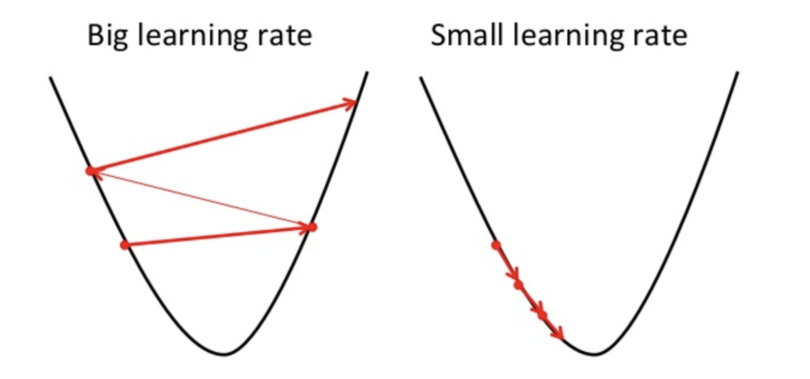
<figcaption aria-hidden="true">A large step size can cause you to step
over the minimum value and get a worse loss value than when you started.
A small step size will get close to the minimum value but can require
many steps. (Image source: <a
href="https://builtin.com/data-science/gradient-descent">Niklas
Donges</a>)</figcaption>
</figure>

## Choosing a loss function

A **loss function** or **loss** is an estimate of how far our
predictions are from the target. The higher the loss, the worse our
model is.

The loss function we plotted above is the **mean squared error (MSE)**
which is by far the most common choice of loss function for regression
problems. To compute this, we:

1.  Evaluate the **error** of each prediction,
    i.e. $target (t) - prediction (y)$
2.  Square this value which means that it is always greater than or
    equal to 0
3.  Take the mean of these over all the examples in the dataset

This can be represented mathematically as:

Let’s illustrate how to compute the MSE for a random value of `m`.

In [4]:
m = random.uniform(-10, 0)  # Pick a random value of 'm'

squared_errors = []
for d in dataset:
  prediction = m * d['Flour']            # Make prediction for this data point, using the current m value (y = m x)
  error = prediction - d['Cake weight']  # Compute the error of this prediction (y - target)
  squared_error = error * error          # Square the error
  squared_errors.append(squared_error)   # Store a copy so we can compute the mean below

mse = sum(squared_errors) / len(dataset) # Take the mean
round(mse)

17458114

Wow that’s high! Our random value of $m$ must be pretty bad!

### Computing the gradient of the loss

When selecting a loss function, the most important requirement is that
we need to be able to compute the gradient of it with respect to our
parameter `m`. This tells us how the loss function will change if we
increase `m`.

For our model, we can compute the gradient of MSE with respect to `m`.
For simplicity, we’ll just consider the loss of one single example so we
can ignore taking the mean.

We want to compute $\frac{dL}{dm}$, given: $$prediction (y) = mx$$
$$loss (L) = (y - t)^2$$

Steps:

1.  Substitute $y = mx$ into $L$

1.  Take derivative of $L$ with respect to $m$

In practice, ML libraries offer a feature called ‘autodiff’ which does
the work of finding the gradients for us. But it’s important to remember
that it must be possible to compute a gradient of your loss function
with respect to your parameter.

## Taking steps down the hill

Now we have everything we need to start taking steps down our hill, that
is, update `m` in order to decrease the loss value. Since the gradient
tells you how the loss will change when you increase `m`, we want to
increase `m` only if the gradient is negative. However, if the gradient
is positive, we want to decrease `m`. For that reason, we *subtract* the
gradient from the current value of `m`.

To control how big a step to take, we multiply the gradient by our step
size which we define as a positive number, typically much smaller than
1.

$$m = m - gradient(loss, m) \times step\_size$$

Plugging in the values of the gradient from above, this becomes:

$$m = m - 2 \times x \times (y - t) \times step\_size$$

We repeat this for every example and complete several **epochs** over
the entire dataset.

## Optimisation algorithms

The goal of gradient descent is to **optimise** (which means to minimise
or maximise) this loss function. For that reason, gradient descent is
referred to as an **optimisation algorithm**. We often refer to the
process of optimising a machine learning model as **training** it or
**fitting** it to the dataset.

But why do we focus on this optimisation algorithm in particular? Well
here are a few other options and the potential issues with them:

1.  Algorithm: compute the loss for a range of `m` values and pick the
    best. Issue: with many parameters, you will have too many possible
    combinations of parameter values to explore.
2.  Algorithm: set the gradient to 0 and solve for `m`. Issue: it turns
    out that there is often no solution so you cannot solve for `m`.
3.  Algorithm: use the Moore-Penrose pseudoinverse[1]. Issue: this is a
    popular approach for small datasets but doesn’t generalise to
    logistic regression or neural networks.

## Hyperparameters

Our choice of optimisation algorithm, our loss function, our step step
size, and the number of epochs are all examples of **hyperparameters**.
The term ‘hyperparameter’ can refer to anything we can configure about
our model which can’t be optimised by gradient descent since we cannot
compute the gradients.

Unlike our parameters, how we **tune** (configure) our hyperparameters
is a very open question. [There are many
techniques](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Approaches)
which can be used to set the hyperparameter values, such as trying at
random or exhaustive search within a range and then evaluating the
performance of the resultant model. Such techniques are forms of
‘optimisation algorithms’ in and of themselves.

For this tutorial, we’ll just use hyperparameter values that I found
worked through from trial and error.

## Implementing gradient descent from scratch

We now have everything we need to train a model using gradient descent:

-   A training dataset: $dataset$
-   A model: $y = mx$
-   A loss function, $L$: mean squared error
-   A way to find gradients: $\frac{dL}{dm} = 2x(y−t)$

|  | Linear regression |
|:------------------|:---------------------------------------------------:|
| Dataset | Cakes with known weights |
| Model, y | $y=mx$ |
| Loss function, L | Mean squared error $$MSE =\frac{\sum{(t - y)^2}}{n} $$ |
| Way to find gradients | $$\frac{dL}{dm} = 2x(y−t)$$ |

Table 2: Everything we need for linear regression.

So what are we waiting for? Below we implement gradient descent from
scratch[2] – you can see that the algorithm is remarkably simple.

[1] If you’re suggesting this, you probably don’t need this tutorial!

[2] Here we focus on a version of gradient descent that updates the
parameter each time we make a prediction on an example. Since we only
consider one data point at a time, the Mean Squared Error is just the
squared error for that point.

In [38]:
m = random.uniform(-100, 100)  # Pick a random starting value for the 'm' parameter (we intentionally pick badly to demonstrate the power of Gradient Descent)
epochs = 10                    # Number of epochs through our dataset to do
learning_rate = 0.0000001      # The learning rate constant

for i in range(epochs):
  for d in dataset:
    prediction = m * d['Flour']            # Make prediction for this data point, using the current m value (y = m x)
    error = prediction - d['Cake weight']  # Compute the error of this prediction (y - target)
    gradient = 2 * d['Flour'] * error      # Compute the gradient of the loss function with respect to m (2 * x * error)
    m = m - learning_rate * gradient       # Descend!

Congratulations! You just trained your first Machine Learning model from
scratch with only 9 lines of pure Python. See, I wasn’t lying.

The final parameter `m` value was:

2.825

Move the slider below to see how the value of `m` improved over the
epochs as it became a better predictor over time:

As we take more steps down the hill, our parameter `m` gets closer to
the optimal value, meaning that our model `y=mx` fits the data
increasingly well.

It can also be useful to plot the value of the loss function over time.
As you would expect, the value goes down over time (first quickly, then
more slowly as the model improves).

Note that we didn’t actually need to compute this loss function to train
the model, *we only needed the gradient*. However, looking at the loss
function can be informative when debugging ML models.

# Evaluation

## Evaluation metrics

Now we have trained our model, we want to get a measure of how well it
will work on new cakes that it wasn’t trained on. We can use this
measure to make business decisions, such as whether to release the model
to a User Interface. It can also be used to help us understand how
trustworthy the model is.

For this purpose, it is common to define a **metric**. A metric is
typically a single number computed by comparing the values predicted by
the model to the ‘target’ values labelled in the dataset.

One obvious possible metric is the loss function used during gradient
descent. However, our loss function is restricted by the fact that it
has to be differentiable with respect to our parameter `m`. There are
often other metrics that we could use which correspond more closely to
the problem we are trying to solve.

In practice, the specific metric we choose is highly problem-specific.
Ideally it should correlate strongly with the assessments that humans
would make of the model’s predictions.

## Dataset splitting

Because our goal is to estimate how well our model does for cakes it
hasn’t seen before, it is critical not to evaluate on data that was used
to train it.

For example, the model could ‘cheat’ by saving all the target values it
saw during training and simply returning them (but returning random
predictions in all other cases). This is related to the problem of
‘overfitting’ discussed later in this tutorial.

For this reason it is common to **split** the dataset into a **training
set** and a **test set**. In this setup, we train the model on the
former but compute the evaluation metrics on the latter. The model
shouldn’t be trained on the test set data.

### Leakage

The process of splitting the dataset rubs up against the concept of
dataset **leakage**. For Machine Learning to work, we need to be able to
generalise from the training set to the test set. For that reason, the
two sets must be similar. However, the more similar the two sets are,
the less well you are able to measure how well your model can generalise
to data that is dissimilar from the dataset.

We typically design the test set to accurately represent the data we
expect to see in practice (e.g. it may be a representative sample). This
can be tricky because, by definition, we don’t know the correct values
for the data that we will see in practice or we wouldn’t need a model.
We try to design the training set in order to maximise the evaluation
metric when computed on the test set (e.g. we may boost the frequency of
rarer examples) but without leaking information from the test set.

Such leakage can happen by many processes, such as by inadvertently
giving the model features that it wouldn’t have in production use cases
(e.g. using the cake’s weight as a feature) or by using knowledge of the
test set to improve the model that isn’t applicable in general (e.g. by
using the evaluation results on the test set to improve your model).

### Random splitting

A simple and common approach is to simply randomly split our annotated
data such that about 80% are in the training set and 20% are in the test
set.

<figure>
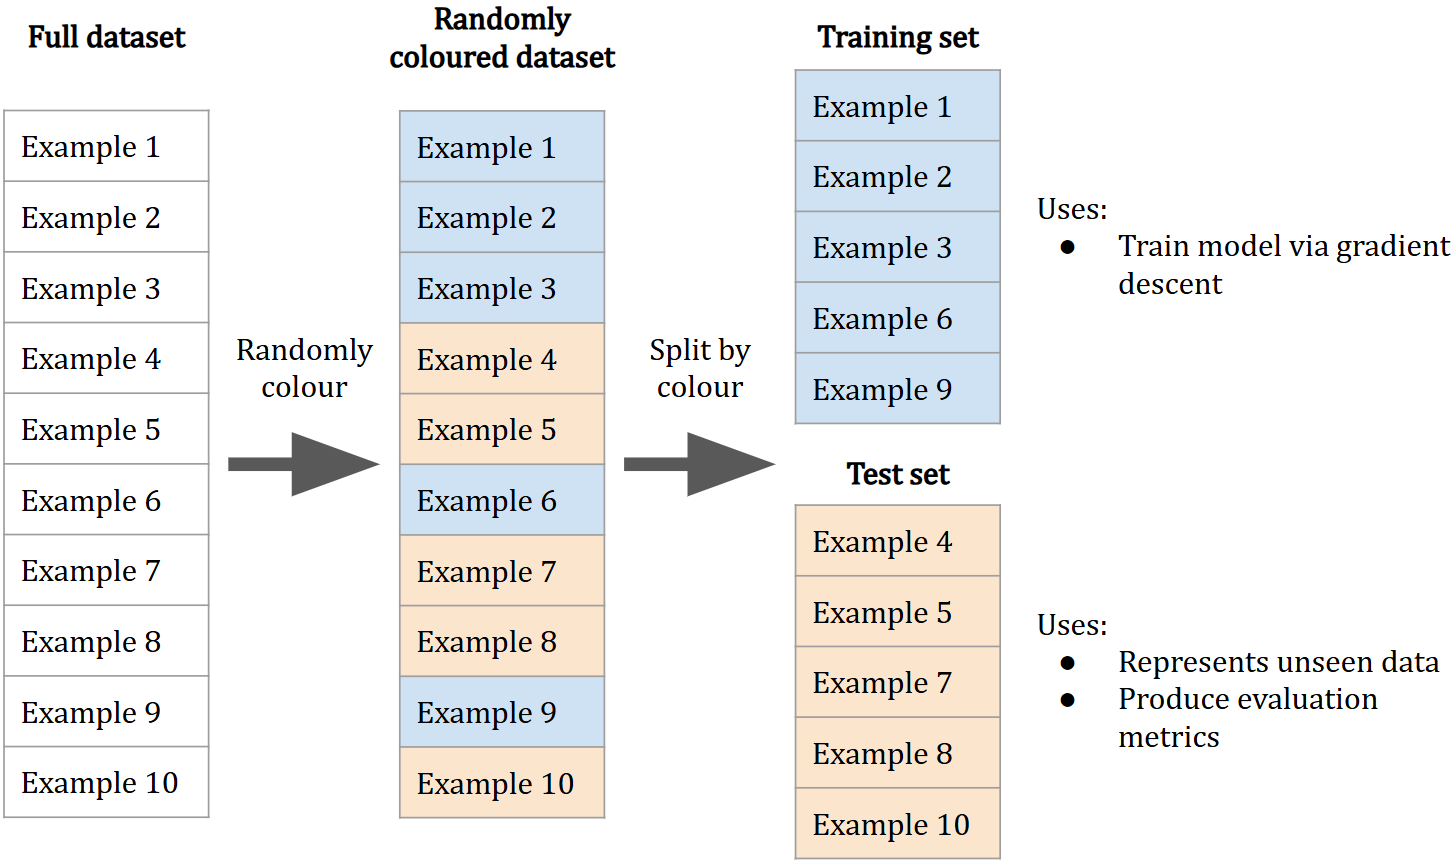
<figcaption aria-hidden="true">Randomly splitting our dataset into a
training set and a test set.</figcaption>
</figure>

We can implement this random splitting for our dataset in Python:

In [12]:
training_set = []
test_set = []

for d in dataset:
  random_number = random.randint(0, 1)
  if random_number == 0:
    training_set.append(d)
  else:
    test_set.append(d)

print(f'Training dataset size: {len(training_set)}')
print(f'Test dataset size: {len(test_set)}')

Training dataset size: 23
Test dataset size: 27

Now we have two sets of data of approximately the same size:

-   One set of data for training a model
-   One set of data for testing that model

## Evaluating our model

For our problem, let’s define our evaluation metric as the fraction of
predictions which are within 10% of the target value. We make this
choice just for illustration, but in practice such a metric may be
useful if we consider this a reasonable accuracy threshold at which
point predictions become useful for our purposes.

In [13]:
number_within_10pct = 0  # Number of data points for which the prediction is within 10% of the target value

for d in test_set:
  prediction = m * d['Flour']     # Make prediction for this data point, using the current m value (y = m x)
  if d['Cake weight'] * 0.9 < prediction < d['Cake weight'] * 1.1:
    number_within_10pct = number_within_10pct + 1

print(f'Fraction within 10% of target: {number_within_10pct} / {len(test_set)} = {number_within_10pct / len(test_set):.3f}')

Fraction within 10% of target: 4 / 27 = 0.148

But wait! When we trained this model, we trained it on the full dataset,
including all the examples in our test dataset. That means that this
number may not accurately represent how well our model will work on data
it hasn’t seen. In other words, we haven’t measured how well the model
will **generalise**.

Instead, we should train a new model using only the training set. Only
then is it appropriate to evaluate on the test set. We’ll do that in the
next section.

# Using multiple features

## Reformulating our model

Our model is well and good, you might say, but a model that just takes
one feature `x` and multiplies it by one parameter `m` is very
restrictive and not very powerful. How can we use this for more
challenging problems?

One simple approach is to just add more features! In our case, this
means considering the counts of several different ingredients.

For linear regression with multiple features, we compute the prediction
as:

$$y = mx_1 + nx_2 + ...$$

To make this easier to write, we represent this model using
[vectors](https://en.wikipedia.org/wiki/Coordinate_vector); we represent
our parameters, `m`, `n`, etc, as vector $w = [m, n, ...]$ (it is
typical to use `w` to signify ‘weights’) and our features, $x_1$, $x_2$,
etc, as vector $x = [x_1, x_2, ...]$. Using [the vector dot
product](https://en.wikipedia.org/wiki/Dot_product), we can now write
our model as:

$$y = wx$$

This formulation looks very similar to the `y = mx` formulation we saw
before but we replace `m` and `x` with vectors. However, as before, the
prediction `y` is a single number.

We still assume that there is a linear (straight line) relationship
between each of our features $x_i$ and our prediction `y`, such that if
we increase the value of any feature $x_i$, `y` will increase
proportionally (or decrease proportionally, if the weight is negative).
For that reason, we still refer to such models as **linear regression**.

<figure>
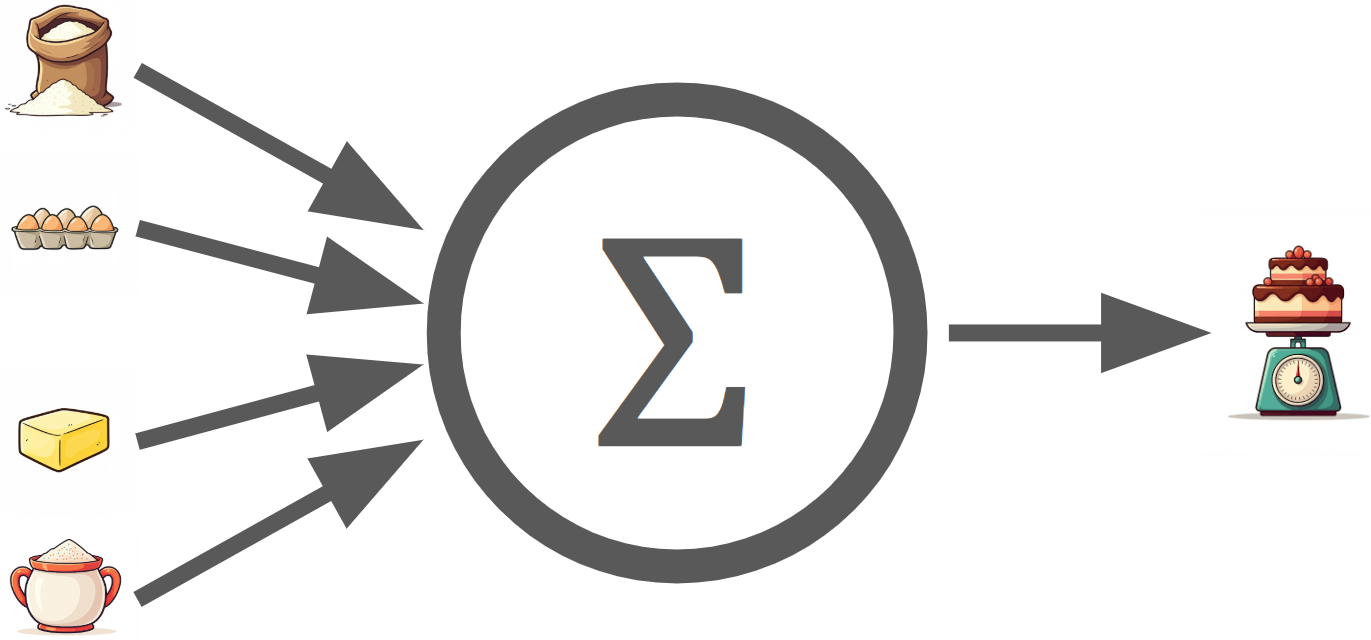
<figcaption aria-hidden="true">A linear regression model with multiple
inputs.</figcaption>
</figure>

For any given example, `example`, and weights, `w`, we can write this
sum in Python as:

In [15]:
features = ('Flour', 'Eggs', 'Butter', 'Sugar')  # Our features
prediction = 0
for feature, weight in zip(features, w):
  prediction = prediction + example[feature] * weight

We can equivalently write this even more simply, with some slightly
fancier Python syntax:

In [16]:
prediction = sum(example[feature] * weight for feature, weight in zip(features, w))

## Extending gradient descent

We can simply extend our gradient descent code from above, but this
time:

-   Instead of just using one feature, we will use all the features
    (ingredients).
-   We will update all the weights in a loop

The equation for the gradient for each weight is the same as we derived
before, `2 * x * (y - t)`. The only thing that changes is we now have a
different feature, $x_i$ corresponding to each weight $w_i$[1].

So our full setup for the multi-parameter model is:

-   Training dataset: $training\_set$
-   Model: $y = w_1x_1 + w_2x_2 + ...$
-   Loss function, $L$: mean squared error
-   Way to find gradients: $\frac{dL}{dw_i} = 2x_i(y−t)$

|  | Linear regression (single parameter) | Linear regression (multi-parameter) |
|:-|:----------------------------------:|:----------------------------------:|
| Dataset | Cakes with known weights | Cakes with known weights |
| Model, y | $y=mx$ | $y = w_1x_1 + w_2x_2 + ...$ |
| Loss function, L | Mean squared error $$MSE =\frac{\sum{(t - y)^2}}{n} $$ | Mean squared error $$MSE =\frac{\sum{(t - y)^2}}{n} $$ |
| Way to find gradients | $$\frac{dL}{dm} = 2x(y−t)$$ | $$\frac{dL}{dw_i} = 2x_i(y−t)$$ |

Table 3: Comparison of single and multi-parameter linear regression.

So let’s do it! Updating our linear regression training loop from
before:

[1] We skip over the full derivation for this gradient but it can be
seen that, if you consider each weight $w_i$ in isolation, the
derivation of the gradient for that weight is equivalent to that for the
single parameter model. For any given weight, $w_i$, the derivative is
independent of any feature $x_{j \neq i}$.

In [39]:
features = ('Flour', 'Eggs', 'Butter', 'Sugar')
w = [random.uniform(0, 100) for _ in features]    # Initialise the 'w' parameter vector randomly
epochs = 25_000                                   # Number of epochs through our dataset to do
learning_rate = 0.000001                          # The learning rate constant

for i in range(epochs):
  for d in training_set:  # This time we only train on the training set
    prediction = sum(d[feature] * weight for feature, weight in zip(features, w))  # Make prediction for this example, using the current w value (y = w x)
    error = prediction - d['Cake weight']                                          # Compute the error of this prediction (y - t)
    # Update all the weights
    for j, feature in enumerate(features):
      gradient = 2 * d[feature] * error       # Compute the gradient of the loss function with respect to the weight for this feature (2 * x * error)
      w[j] = w[j] - learning_rate * gradient  # Descend!

Again, let’s plot how our loss changed over time:

Let’s take a look at how our parameters converged over time and compare
them to the optimal weight[1]:

[1] This optimal weight was the one I used to generate the dataset in
the first place.

Nice! The more steps we take, the closer the weights we assign to each
ingredient get to their true optimal values.

We can also plot our predictions and targets against the amount of
flour:

The predictions no longer follow a straight line when plotted against
the amount of flour. This is because our example cakes contain different
amounts of other ingredients, in addition to the flour, that our model
now also considers when making predictions. However, if humans could
visualise all the ingredients on different axes, we would see that the
straight line pattern still holds.

## Adding a bias term

One caveat with our model so far is that we assume that when all
features `x` are 0, then `y = 0` regardless of the weights `w`. In terms
of the familiar line equation `y = mx + c`, this means that we assume
that the y-intercept `c` is 0. This is fine for our current problem
because when we have no ingredients the “cake” weighs nothing. However,
in other cases we may need to model datasets where this isn’t true. In
Machine Learning, we refer to this ‘y-intercept’ term as the **bias**
term.

The solution turns out to be simple to adapt our model for this issue.
We introduce one extra feature, $x_n$, which is always set to 1. As a
result, the parameter $w_n$ corresponding to this feature will represent
the y-intercept and we can learn this parameter just like any other. It
is common to see this represented either explicitly `y = wx + b` or
implicitly `y = wx`.

For now, we’ll not bother adding a bias term especially since we know
that our y-intercept should be 0.

## Evaluating our new model

Our model with more features obtains a much lower loss value. Let’s
recompute our evaluation metric and see if these extra features helped.

In [23]:
number_within_10pct = 0  # Number of data points for which the prediction is within 10% of the target value

for d in test_set:
  prediction = sum(d[feature] * weight for feature, weight in zip(features, w))  # Make prediction for this data point, using the current w value (y = w x)
  if d['Cake weight'] * 0.9 < prediction < d['Cake weight'] * 1.1:
    number_within_10pct = number_within_10pct + 1

print(f'Fraction within 10% of target: {number_within_10pct} / {len(test_set)} = {number_within_10pct / len(test_set):.3f}')

Fraction within 10% of target: 27 / 27 = 1.000

I think the technical term is “wowza”!

You can see that by giving the model more information (in the form of
features) it can make much more accurate predictions than we could with
just one feature. Moreover, because we didn’t train this model on the
test set, our new accuracy score should be a good estimate of how well
our model will do on new data for which we don’t already have the
labels.

# Overfitting

## The curse of overfitting

Oh, and just one more thing. Machine Learning is plagued by a curse
called **overfitting**.

This is a key challenge that plagues Machine Learning models which we
must be careful to mitigate. To understand the problem, let’s walk
through the stages that a model goes through during training.

In the early stages of training, our model has not trained long enough
to be a good predictor of the data and so training more will help. We
call such models **underfit**.

<figure>
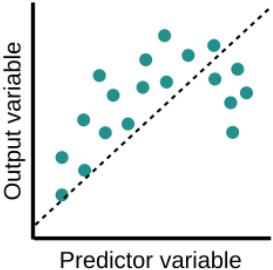
<figcaption aria-hidden="true">An underfit model has not trained long
enough to be a good predictor of the data.</figcaption>
</figure>

At some point, if our model is powerful enough, it will eventually reach
a point where it is well fit to the data. However, because there is
noise in the data that we cannot model[1], it does not predict every
point perfectly.

<figure>
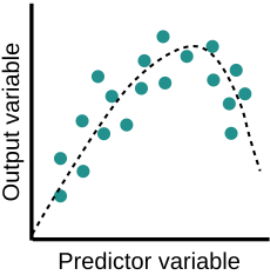
<figcaption aria-hidden="true">A well fit model is a good predictor of
the data but cannot predict every data point perfectly due to
noise.</figcaption>
</figure>

If we continue training for a long time, our model will continue to
reduce the error in the predictions it makes on the training set.
However, instead of fitting to the signal in the dataset, it is fitting
to the noise! The result is a complex model that is less likely to make
accurate predictions on unseen data. Such models are called **overfit**.

<figure>
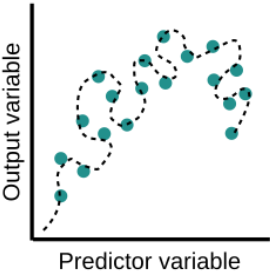
<figcaption aria-hidden="true">An overfit model has fit to the noise in
the training data. It predicts the training data well but will not do
well on data it hasn’t seen.</figcaption>
</figure>

## Addressing overfitting

The fundamental issue of overfitting is that our model ends up
contorting into complex or ‘irregular’ shapes. In general, smoother
models are more likely to match unseen data. In contrast, models that
[make more assumptions about what lies in the spaces between the
training data points are more likely to be
mistaken](https://en.wikipedia.org/wiki/Occam%27s_razor).

So to address overfitting we want to encourage our model to be more
regular. We say that we want to **regularise** it.

There are many regularisation techniques and the uses of the term have
expanded over time to encompass many ideas. A few examples include:

-   Stopping training earlier
-   Reducing the number of parameters in the model
-   Modifying the loss function to penalise larger model weights

Because linear regression models are simple and have few parameters,
they are much less likely to suffer from overfitting than models such as
neural networks. However, it remains a critical problem that you should
bear in mind for all ML problems.

## Validation sets

Holding out a test set is critical to help mitigate overfitting. To
measure overfitting, we can compare how well the model performs on the
training set to how well it performs on the test set. If the model does
much better on the training set, it is likely to be overfit.

However, the more frequently we evaluate models on the test set, the
more this can guide our decisions about the model. This leads to another
form of overfitting. Even if we don’t train the model on the test set,
the more decisions we make about the model based on the test set, the
more likely it is that we overfit to the test set, and the more likely
that our model will not perform as well on unseen data. This is a form
of [leakage](#leakage).

To alleviate this concern it is common to split our dataset into three:

-   A training set
-   A test set
-   A **validation set**

This validation set serves as a proxy for the test set which we can use
without worrying that we are overfitting to the test set. Our test set
will then only be used sparingly to give a final measure of how well our
model is likely to perform on unseen data. The validation set can then
be used, for example, to tune our hyperparameters or to detect
overfitting to the training set.

<figure>
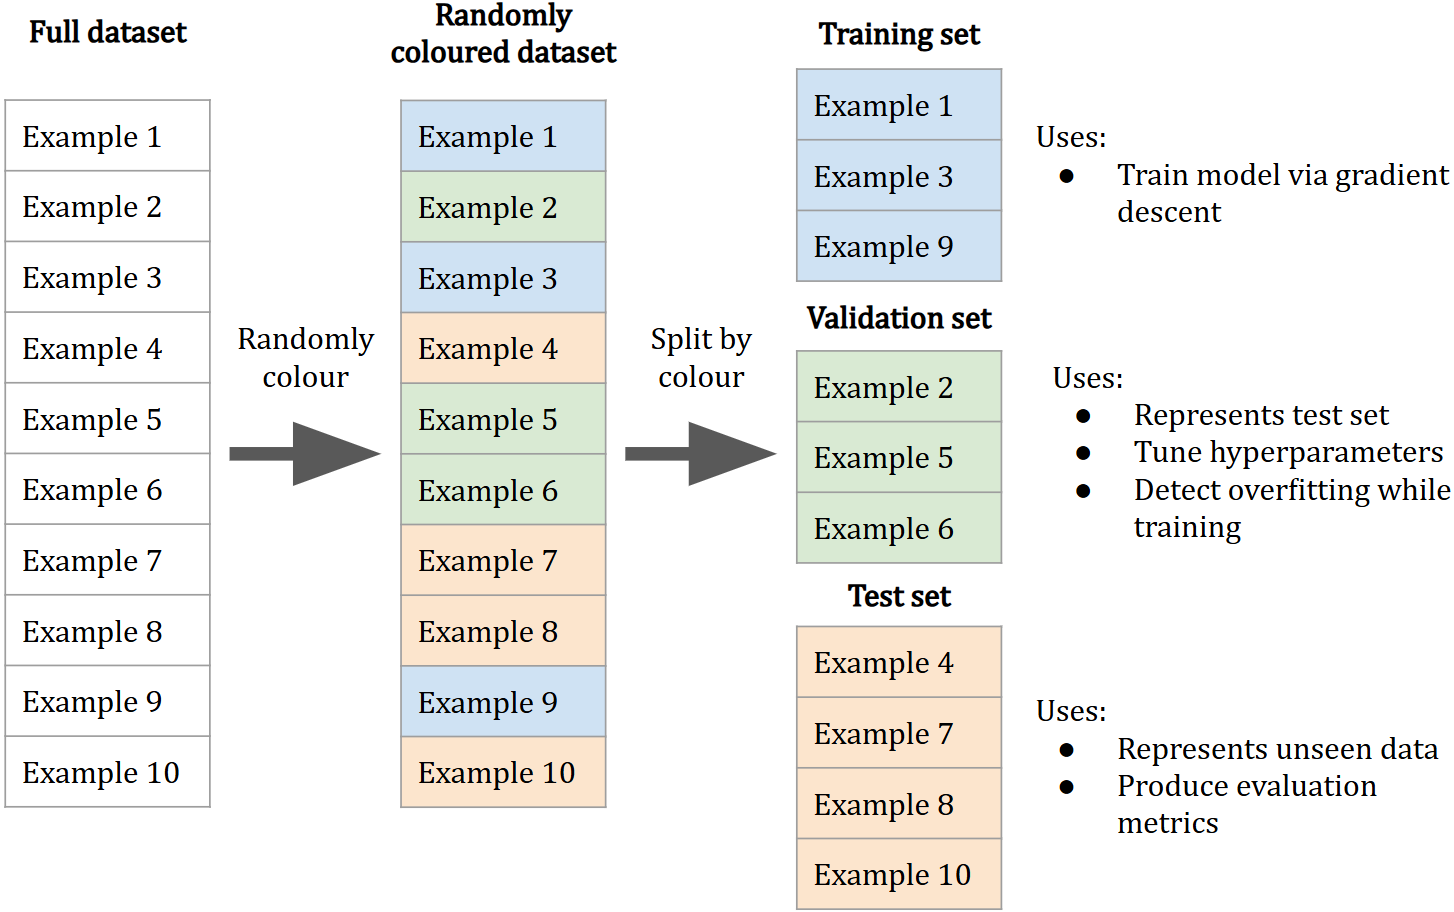
<figcaption aria-hidden="true">A validation set serves as a proxy for
the test set.</figcaption>
</figure>

# What we learned

And that’s a wrap!

Congratulations on making it to the end of this tutorial, I really hope
you found it valuable.

Here’s a summary of the key concepts that we introduced:

-   ML theory: models, generalisation, underfitting, overfitting,
    regularisation, hyperparameters
-   Linear regression: the linear equation, inputs/features,
    parameters/weights, biases, outputs/predictions, targets/labels
-   Optimisation: training/fitting, gradient descent, step
    sizes/learning rates, loss functions, mean squared error (MSE),
    epochs
-   Evaluation: evaluation metrics & their purpose
-   Dataset splitting: training set, validation set, test set, leakage

Please let me know in the comments if you have any questions.

# What’s next?

The next tutorial will be on classification using logistic regression.
Watch this space!

[1] There are many sources of noise (random variations) in our training
set labels, such errors in the measurement device or variations caused
by factors that aren’t represented by our input features.